# Example -- Plotting

底下的幾個例子我們將學習怎麼使用繪圖指令。

畫圖的時候我們會用到 Plots 這個 package，因此在第一行我們需要加上：

In [1]:
using Plots

以下我們舉幾個簡單的範例來看看如何操作. 

不過 `Plots` 這個 package 完整的說明請見 [Plots](http://docs.juliaplots.org/latest/)

## Example 1.1 基本函數
這是一個畫出 $\sin(x)$ 的例子。在 plot 指令中我們指定三件事:
1. 告訴他我們要畫 $y = \sin(x)$ 這個函數。
2. 再來要指定函數的範圍 $-2\pi < x < \pi$。
3. 最後用 label 標註函數圖形。注意要把標註的文字放在 " " 中。

另外，也可以畫 $e^x$、$arcsin(x)$ 這些基本函數。

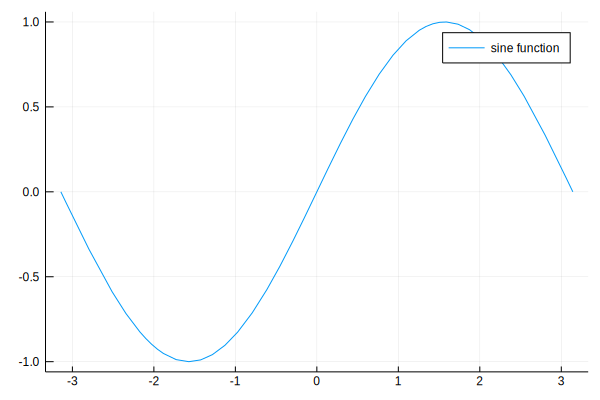

In [2]:
plot(sin, -pi, pi, label="sine function")

## Example 1.2 基本函數
這是一個畫出 $\sin^{-1}(x)$ 的例子，有幾件事需要注意：
1. $\sin(x)$ 的反函數 $arcsin(x)$ 的指令為 asin。
2. 函數的範圍為 $-1 < x < 1$。

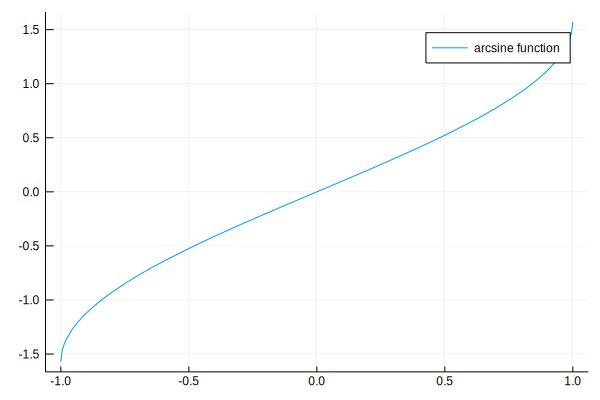

In [3]:
plot(asin, -1, 1, label="arcsine function")

## Example 2
接著我們看三維圖形的例子。這個例子中我們要畫出三圍中的一條曲線

$$\left(x(t), y(t), z(t)\right) = (t\cos t, t\sin t, t), \quad t\in[0, 8\pi].$$

1. 先將 $8\pi$ 切成 N 等分, 間距為 $\Delta t = 8\pi/N$.
    1. 在 julia 中可使用 unicode 變數名稱, 比如 $\Delta$ 打法是 `\Delta` 接著按 tab 鍵, $\pi$ 則是 `\Pi`.
2. 定義 $n$ 是一個 $(N+1)\times 1$ 的向量，n = [0, 1, 2, ...,N]。
3. 定義 $t_i$ 是 $\Delta t\times n$
3. $x = t_i .*\cos .(ti)$，注意向量相乘以及函數在向量的取值都需要加個`.`。
4. y 與 z 的值與 x 的值定義方法類似。

由 (x,y,z) 的定義方式我們知道它是一個螺旋線，螺旋的半徑從 0 一直增加到 $8 \pi$。角度也是從 0 到 $8 \pi$，所以總共繞了4圈。
在 plot 指令中我們用 marker 選擇圖形的樣式為圓圈(circle)，legend=false 代表不標記圖形。

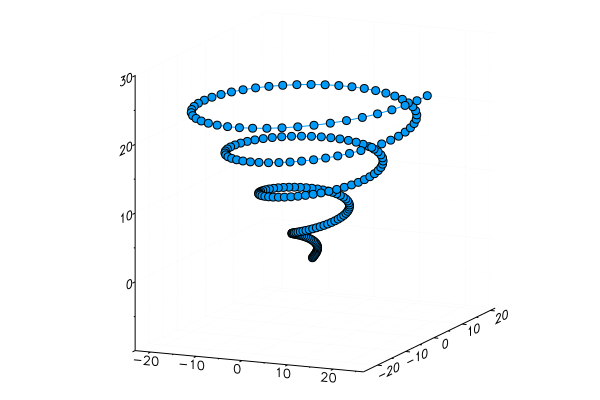

In [4]:
N = 200;
Δt = 8*π/N;
n= 0.0:N;
ti = Δt*n
x = ti.*cos.(ti);
y = ti.*sin.(ti);
z = ti;
plot(x, y, z, marker=:circle, legend=false)

另外, 可以用 `camera` 這個指令來調整 3D 視角, 裡面數字是角度 (方位角azimuth, 高度角altitude).

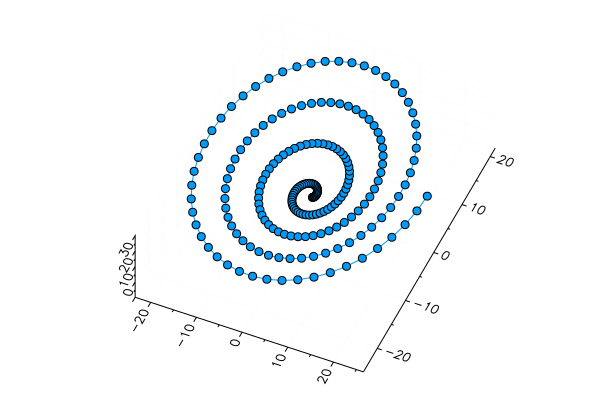

In [5]:
plot(x, y, z, marker=:circle, legend=false, camera = (30, 80))

我們也可以使用指令 `plotd3d`.
* 我們設定 linewidth (lw) 等於 2 以及 legend (leg) 等於 false 表示不標記圖形.

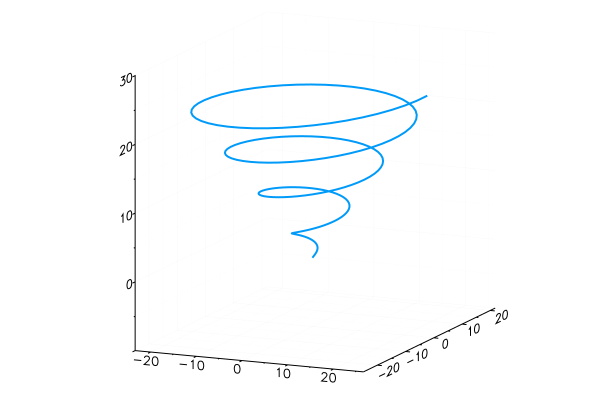

In [6]:
plot3d(x, y, z, lw=2, leg=false)

## Example 3
這個例子中，我們將學到怎麼在一個畫好的圖形上再加上另一個圖形。
我們嘗試一個簡單的例子，
1. 第一個圖形，x 座標是取整數 1 到 10。y 軸取 0 到 1 之間的亂數，共十個小數。再來，用 plot 指令將第一個圖形畫出。
2. 第二個圖形，使用相同的 x 座標，函數值 z 取亂數。將第二個函數圖形與第一個圖形重疊，我們需要指令 plot!

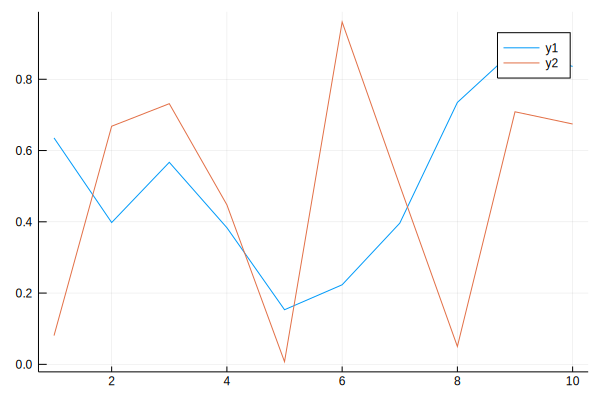

In [7]:
x = 1:10; y = rand(10);
plot(x,y)
z = rand(10)
plot!(x,z)

## Example 4
在一個圖形中同時畫出兩個函數，除了上述的方法之外我們還可以這麼做： 直接把兩個函數值定義成一個矩陣
1. 定義 x 是整數 1 到 10。
2. 定義函數值 y 是一個 10*2 的矩陣，矩陣的第一行代表第一個函數的值，而矩陣的第二行代表第二個函數的值。y值的取法為 0 到 1 之間的亂數，為小數。

使用 plot 將兩個函數值同時畫出，用 title 設定圖形標題，lw=3 設定線段寬度。

用 label=["Line 1" "Line 2"] 標記函數名稱，須注意順序：
Line 1 會標記 y 的第一個函數值，Line 2 會標記 y 的第二個函數值。

x 軸的名稱有兩種設定方式，
1. 在 plot 指令中加入：xlabel = "My x label"。 (xlabel 後面不用"!")
2. 或是在 plot 指令的下一行用 xlabel!("My x label") 加入。(xlabel! 後面要用"!")

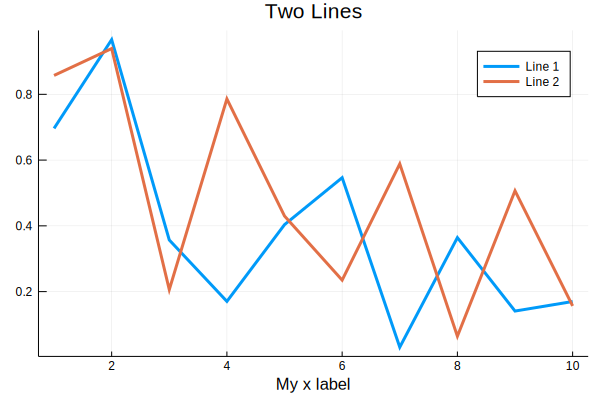

In [8]:
x = 1:10; y = rand(10,2);
plot(x,y,title="Two Lines",label=["Line 1" "Line 2"],lw=3,xlabel = "My x label")

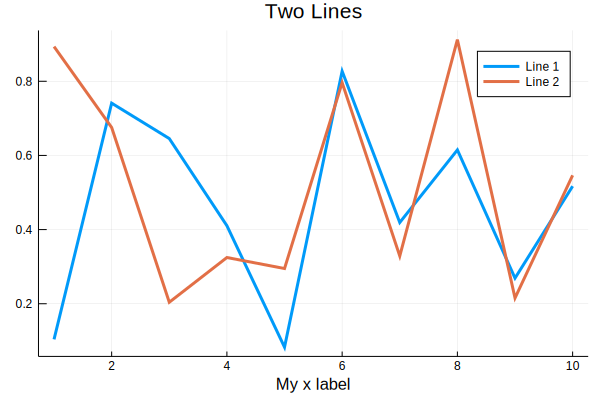

In [9]:
x = 1:10; y = rand(10,2);
plot(x,y,title="Two Lines",label=["Line 1" "Line 2"],lw=3)
xlabel!("My x label")

## Example 5
如果函數取點的方法不同，能不能畫在同一張圖形中呢？
我們看下面的例子：
1. y 這個矩陣裡包含兩筆資料，x 的取點都是整數 1 到 10。所以可以用 "一個" 指令把兩筆資料畫出來。令這張圖叫做 p
2. z 這筆資料為 0 到 1 中的 19 個亂數，xx 的取點也是19個在 [1, 10] 的均勻取點。所以我們用 plot! 指令，先畫出 p, 再把 z 這筆資料畫上去。

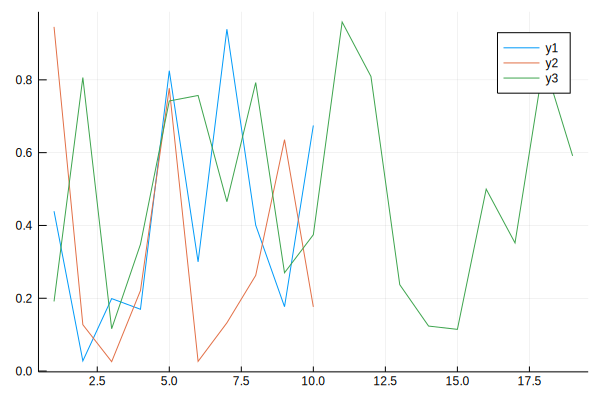

In [10]:
x = 1:10; y = rand(10,2);
p = plot(x,y)

xx = 1:19
z = rand(19)
plot!(p,xx,z)

**NOTE:** 利用 `plot(x,y,xx,z)` 這樣的指令是行不通的!

**Remark:** 另外，畫圖也可以用 `PyPlot` 這個 package，有很多有趣的效果可以用。

更多範例請見 [Julia Data Visualization](http://blog.maxkit.com.tw/2019/06/julia-data-visulization.html)

## Example 6 - 曲面

這個例子我們示範如何畫曲面 $(x, y, h(x,y))$, where $h(x,y) = exp(-(x^2+y^2))$.

* 首先, 我們設定 x 與 y 的範圍 $[-1, 1]$.
* 接著我們設定函數 "h"
* 最後, 我們利用指令 `surface` 來畫曲面.

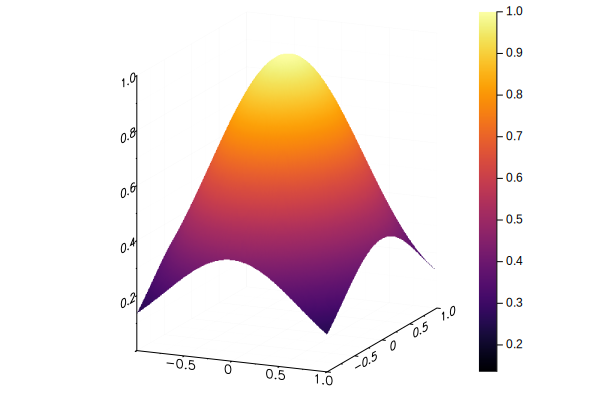

In [11]:
x=-1:0.01:1;
y=-1:0.01:1;
h(x,y)=exp.(-(x^2+y^2));
surface(x,y,h)

## Example 7: 動畫

如果要將很多圖片合在一起做成動畫也是可以, 以下這個簡單例子將動畫存成一個 gif 檔. 

更多細節請見 [julia_plots_animations](https://docs.juliaplots.org/latest/animations/)

In [12]:
p = plot([sin, cos], zeros(0), leg=false)
anim = Animation()
for x = range(0, stop=10π, length=100)
    push!(p, x, Float64[sin(x), cos(x)])
    frame(anim)
end
gif(anim, "sine_cosine.gif")

┌ Info: Saved animation to 
│   fn = /Users/tslin/Dropbox/git/spectral_method_julia/julia_tutorials/sine_cosine.gif
└ @ Plots /Users/tslin/.julia/packages/Plots/Iuc9S/src/animation.jl:95


Plots.AnimatedGif("/Users/tslin/Dropbox/git/spectral_method_julia/julia_tutorials/sine_cosine.gif")